In [2]:
import os, pandas as pd, numpy as np
import ROOT
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from ROOT import TCanvas, TH1D
sns.set()

In [57]:
def create_track_list(tfile_tdaq):
    tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/' + str(tfile_tdaq) + '.root'
    data_run = ROOT.TFile(tfile_path)
    
    reco_tree = data_run.Get('RECOdata')
   
    micromega1x= 0
    micromega2x= 0
    micromega3y= 0
    mimosa0x= 0
    mimosa0y= 0
    mimosa1x= 0
    mimosa1y= 0
    mimosa2x= 0
    mimosa2y= 0
    dwc0x= 0
    dwc0y= 0
    '''
    micromega1x= -10.564471784019508
    micromega2x= -0.025884502340847576
    micromega3y= -11.74195086475566
    mimosa0x= 0.08463667999269381
    mimosa0y= -0.056565280079979845
    mimosa1x= -0.06449192869238878
    mimosa1y= -0.07193527449474807
    mimosa2x= 0.09808760125634848
    mimosa2y= -0.004454130628000803
    dwc0x= 0.02162774732829503
    dwc0y= -0.135752433620644
    '''
    counter = 0
    track_list = []
   
    for event in reco_tree:
        if (len(event.DWC0_xPosition) >= 2 or len(event.Chamber1_position) >= 2 or 
            len(event.Chamber2_position) >= 2 or len(event.Chamber3_position) >= 2):
            counter += 1
            continue
        elif (len(event.DWC0_xPosition) == 0 and len(event.Chamber1_position) == 0 and 
            len(event.Chamber2_position) == 0 and len(event.Chamber3_position) == 0):
            counter += 1
            continue
        elif ((len(event.DWC0_xPosition) == 0 and len(event.Chamber1_position) == 0 and len(event.Chamber2_position) == 0 and len(event.Chamber3_position) != 0) or 
            (len(event.DWC0_xPosition) == 0 and len(event.Chamber1_position) == 0 and len(event.Chamber2_position) != 0 and len(event.Chamber3_position) == 0) or
            (len(event.DWC0_xPosition) == 0 and len(event.Chamber1_position) != 0 and len(event.Chamber2_position) == 0 and len(event.Chamber3_position) == 0) or 
            (len(event.DWC0_xPosition) != 0 and len(event.Chamber1_position) == 0 and len(event.Chamber2_position) == 0 and len(event.Chamber3_position) == 0)):
            counter += 1
            continue

        track = []
        track.append(list(zip([x-mimosa0x for x in event.Mimosa0_xPosition], [x-mimosa0y for x in event.Mimosa0_yPosition])))
        track.append(list(zip([x-mimosa1x for x in event.Mimosa1_xPosition], [x-mimosa1y for x in event.Mimosa1_yPosition])))
        track.append(list(zip([x-mimosa2x for x in event.Mimosa2_xPosition], [x-mimosa2y for x in event.Mimosa2_yPosition])))

        track.append(list(zip([x-dwc0x for x in event.DWC0_xPosition], [x-dwc0y for x in event.DWC0_yPosition])))
        #track.append(list(zip([x-dwc1x for x in event.DWC1_xPosition], [x-dwc1y for x in event.DWC1_yPosition])))

        track.append(list([x-micromega1x for x in event.Chamber1_position]))
        track.append(list([x-micromega2x for x in event.Chamber2_position]))
        track.append(list([x-micromega3y for x in event.Chamber3_position]))
        track.append(counter)
        track_list.append(track)

        counter += 1
        
    return track_list, counter

def pre_magnet_track(track_list, z_vals, event=0):
    zs = np.array([[0,8.5,16]])
    min_error = 100
    for (x1, y1) in track_list[event][0]:
        for (x2, y2) in track_list[event][1]:
            for (x3, y3) in track_list[event][2]:
                X = np.array([[x1, y1, z_vals[0]], [x2,y2, z_vals[1]], [x3,y3,z_vals[2]]])
                X_mean = X.mean(axis=0)
                uu, dd, vv = np.linalg.svd(X - X_mean)
                linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]
                linepts += X_mean
                direction = linepts[1]-linepts[0]
                z_t = (z_vals-linepts[0][2])/direction[2]
                points = np.concatenate((np.reshape(linepts[0, 0:2], (2,1)) + (z_t * np.reshape(direction[0:2], (2,1))), zs))
                error = np.mean(np.square(points.T - X))
                if error < min_error:
                    best_track = np.array([[x1,x2,x3],[y1,y2,y3], [0,8.5,16]])
                    min_error = error
                
    print(min_error)
    print(best_track)

        
def display_event_scatterplot(track_list, event_index):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    ax1.scatter(*zip(*track_list[event_index][0]), c='r')
    ax1.scatter(*zip(*track_list[event_index][1]), c='g')
    ax1.scatter(*zip(*track_list[event_index][2]), c='b')
    ax1.scatter(*zip(*track_list[event_index][3]), c='y')
        #ax1.scatter(*zip(*track_list[i][4]), c='black')
        #ax1.scatter(*zip(*track_list[i][5]), c='brown')

    
    

In [58]:
track_list, counter = create_track_list(1572179299)
#1572100097
#1572100629
'''
1572201397
1572201758
1572202090
'''


'\n1572201397\n1572201758\n1572202090\n'

In [59]:
len(track_list)

63392

In [60]:
counter

200496

In [61]:
no_hit

31964

In [ ]:
mimosa_list[3]

In [ ]:
mimosa_list[7][0]

In [ ]:
idx = 0
plt.figure(figsize=(14,10))
plt.scatter(np.full((len(mimosa_list[idx][0])),0), np.array(mimosa_list[idx][0])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[idx][1])),8.5), np.array(mimosa_list[idx][1])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[idx][2])),16.5), np.array(mimosa_list[idx][2])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[idx+1][0])),0), np.array(mimosa_list[idx+1][0])[:, 0], c='g', s=20)
plt.scatter(np.full((len(mimosa_list[idx+1][1])),8.5), np.array(mimosa_list[idx+1][1])[:, 0], c='g', s=20)
plt.scatter(np.full((len(mimosa_list[idx+1][2])),16.5), np.array(mimosa_list[idx+1][2])[:, 0], c='g', s=20)

In [ ]:
np.full((len(mimosa_list[0][1])),0).shape

In [ ]:
np.array(mimosa_list[0][0])[:, 0].sha

In [ ]:
np.array(mimosa_list[0][0])[:, 1]

In [ ]:
pre_magnet_track(track_list, [0, 8.5, 16.5], event=30)

In [ ]:
event = 91
zs = np.array([[0,8.5,16]])
#print(zs.shape)
min_error = 100
for (x1, y1) in track_list[event][0]:
    for (x2, y2) in track_list[event][1]:
        for (x3, y3) in track_list[event][2]:
            X = np.array([[x1, y1, 0], [x2,y2,8.5], [x3,y3,16]])
            #print(X)
            X_mean = X.mean(axis=0)
            uu, dd, vv = np.linalg.svd(X - X_mean)
            #print(vv[0])
            linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]
            linepts += X_mean
            direction = linepts[1]-linepts[0]
            z_t = (zs-linepts[0][2])/direction[2]
            points = np.concatenate((np.reshape(linepts[0, 0:2], (2,1)) + (z_t * np.reshape(direction[0:2], (2,1))), zs))
            error = np.mean(np.square(points.T - X))
            if error < min_error:
                best_fit = linepts
                best_points = np.array([[x1,x2,x3],[y1,y2,y3], [0,8.5,16]])
                best_pts = points
                print(np.sum(np.square(best_pts[0:2] - best_points[0:2]) / best_pts[0:2], axis=1))
                min_error = error
                
print(best_fit)
print(min_error)
print(best_points)
print(best_pts)


In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(np.full((len(mimosa_list[event][0])),0), np.array(mimosa_list[event][0])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[event][1])),8.5), np.array(mimosa_list[event][1])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[event][2])),16), np.array(mimosa_list[event][2])[:, 0], c='r')
plt.scatter(np.full((len(mimosa_list[event+1][0])),0), np.array(mimosa_list[event+1][0])[:, 0], c='g', s=20)
plt.scatter(np.full((len(mimosa_list[event+1][1])),8.5), np.array(mimosa_list[event+1][1])[:, 0], c='g', s=20)
plt.scatter(np.full((len(mimosa_list[event+1][2])),16), np.array(mimosa_list[event+1][2])[:, 0], c='g', s=20)
plt.plot(best_pts[2], best_pts[0])

In [ ]:

plt.figure(figsize=(14,10))
plt.ylim(-10,10)
for event in range(len(track_list)):
    x1 = [x[0] for x in track_list[event][0]]
    x2 = [x[0] for x in track_list[event][1]]
    x3 = [x[0] for x in track_list[event][2]]
    x4 = [x[0] for x in track_list[event][3]]
    x5 = [x for x in track_list[event][4]]
    x6 = [x for x in track_list[event][5]]
   
    for (a,b,c,d,e,f) in zip(x1,x2,x3,x4,x5,x6):
        plt.scatter(0, a, c='r')
        plt.scatter(8.5, b, c='orange')
        plt.scatter(16, c, c='y')
        plt.scatter(221, d, c='g')
        plt.scatter(262, e, c='blue')
        plt.scatter(494, f, c='violet')

#plt.plot(best_pts[2], best_pts[0])
plt.ylabel('x-axis (cm)')
plt.xlabel('z-axis (cm)')
#plt.scatter(best_points[2], best_points[0])
plt.show()


In [ ]:
accepted = []
for i in range(len(track_list)):
    #print(track_list[i][5])
    if any(x <= 5 and x >= -5 for x in track_list[i][5]):
        accepted.append(i)

In [ ]:
track_list[event][0]

In [ ]:
track_list[event][0]

[0.14168, -0.74336, -0.7415200000000001, -0.89056, 0.22264, 0.79672, 0.22724, 0.2944, -0.40296, -0.10181333333333341, 0.05296571428571438, -0.30084, -0.17020000000000002, -0.19182000000000002, -0.760656, -0.23368]


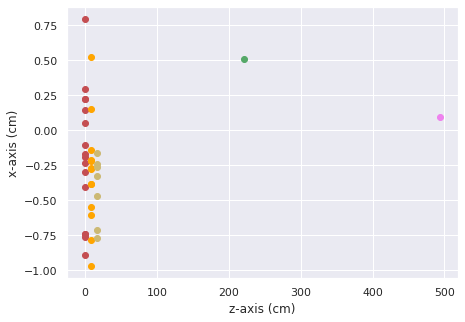

In [67]:
plt.figure(figsize=(7,5))
event = 100
x1 = [x[0] for x in track_list[event][0]]
x2 = [x[0] for x in track_list[event][1]]
x3 = [x[0] for x in track_list[event][2]]
x4 = [x[0] for x in track_list[event][3]]
x5 = [x for x in track_list[event][4]]
x6 = [x for x in track_list[event][5]]
print(x1)
for i in x1:
    plt.scatter(0, i, c='r')
for i in x2:
    plt.scatter(8.5, i, c='orange')
for i in x3:
    plt.scatter(16.5, i, c='y')
for i in x4:
    plt.scatter(221, i, c='g')
for i in x5:
    plt.scatter(262, i, c='blue')
for i in x6:
    plt.scatter(494, i, c='violet')

#plt.plot(best_pts[2], best_pts[0])
plt.ylabel('x-axis (cm)')
plt.xlabel('z-axis (cm)')
#plt.scatter(best_points[2], best_points[0])
plt.show()

In [ ]:
len(accepted)

In [ ]:
x1 = [x[0] for x in track_list[event][0]]
x2 = [x[0] for x in track_list[event][1]]
x3 = [x[0] for x in track_list[event][2]]
x4 = [x[0] for x in track_list[event][3]]
x5 = [x for x in track_list[event][4]]
plt.figure(figsize=(12,8))
for (a,b,c) in zip(y1,y2,y3):
    plt.scatter(0, a)
    plt.scatter(8.5, b)
    plt.scatter(16.5, c)
    pass
for d in zip(y4):
    plt.scatter(221, d)
for e in y5:
    plt.scatter(480, e)
    
plt.plot(best_pts[2], best_pts[1])
plt.scatter(best_points[2], best_points[1])
plt.show()

In [ ]:
sum_x = 0
total = 0
for i in range(len(track_list)):
    mm1 = np.array(track_list[i][3])
    sum_x += np.sum(mm1[:, 0])
    total += mm1.shape[0]
print(sum_x/total)

In [ ]:
tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root'
data_run = ROOT.TFile(tfile_path)

In [ ]:
ttree = data_run.Get('RECOdata')

In [ ]:
c1 = TCanvas("c1", "c1", 800, 600)
ttree.Draw("Chamber1_position")
c1.Draw()

In [ ]:
c2 = TCanvas("c2", "c2", 800, 600)
ttree.Draw("Chamber2_position+0.025884502340847576")
c2.Draw()

In [ ]:
c3 = TCanvas("c3", "c3", 800, 600)
ttree.Draw("Mimosa1_xPosition+0.02764", 'NMimosa1_xPosition>0 && Mimosa1_xPosition<0.5 && Mimosa1_xPosition>-0.5')
c3.Draw()

In [ ]:
hist1 = TH1D('hist1', 'Mimosa0',100, -0.5, 0.5)
hist2 = TH1D('hist2', 'Mimosa1', 100, -0.5, 0.5)
ttree.Draw("Mimosa0_xPosition>>hist1", 'NMimosa0_xPosition>0 && Mimosa0_xPosition<0.5 && Mimosa0_xPosition>-0.5')
ttree.Draw("Mimosa1_xPosition>>hist2", 'NMimosa1_xPosition>0 && Mimosa1_xPosition<0.5 && Mimosa1_xPosition>-0.5')
c4 = TCanvas("c4", "c4", 800, 600)
hist1.Draw()
hist2.SetLineColor(ROOT.kRed)
hist2.Draw('same')
c4.Draw()

x = np.mgrid[-2:5:120j]
y = np.mgrid[1:9:120j]
z = np.mgrid[-5:3:120j]

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

In [ ]:
for event in len(track_list):
    zs = np.array([[0,8.5,16, 221]])
    min_error = 100
    for (x1, y1) in track_list[event][0]:
        for (x2, y2) in track_list[event][1]:
            for (x3, y3) in track_list[event][2]:
                X = np.array([[x1, y1, z_vals[0]], [x2,y2, z_vals[1]], [x3,y3,z_vals[2]]])
                X_mean = X.mean(axis=0)
                uu, dd, vv = np.linalg.svd(X - X_mean)
                linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]
                linepts += X_mean
                direction = linepts[1]-linepts[0]
                z_t = (z_vals-linepts[0][2])/direction[2]
                points = np.concatenate((np.reshape(linepts[0, 0:2], (2,1)) + (z_t * np.reshape(direction[0:2], (2,1))), zs))
                error = np.mean(np.square(points.T - X))
                if error < min_error:
                    best_track = np.array([[x1,x2,x3],[y1,y2,y3], [0,8.5,16]])
                    min_error = error

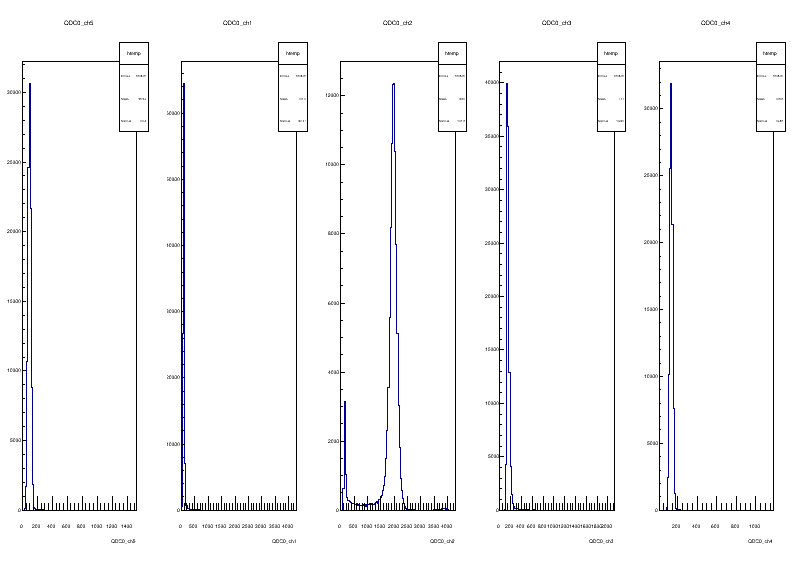

In [3]:
#1572179299
#1572188706

tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572191829.root'
data_run = ROOT.TFile(tfile_path)
ttree = data_run.Get('RAWdata')

c1 = TCanvas("c1", "c1", 800, 600)
c1.Divide(5,1)
c1.cd(1)
ttree.Draw("QDC0_ch5")
c1.cd(2)
ttree.Draw("QDC0_ch1")
c1.cd(3)
ttree.Draw("QDC0_ch2")
c1.cd(4)
ttree.Draw("QDC0_ch3")
c1.cd(5)
ttree.Draw("QDC0_ch4")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


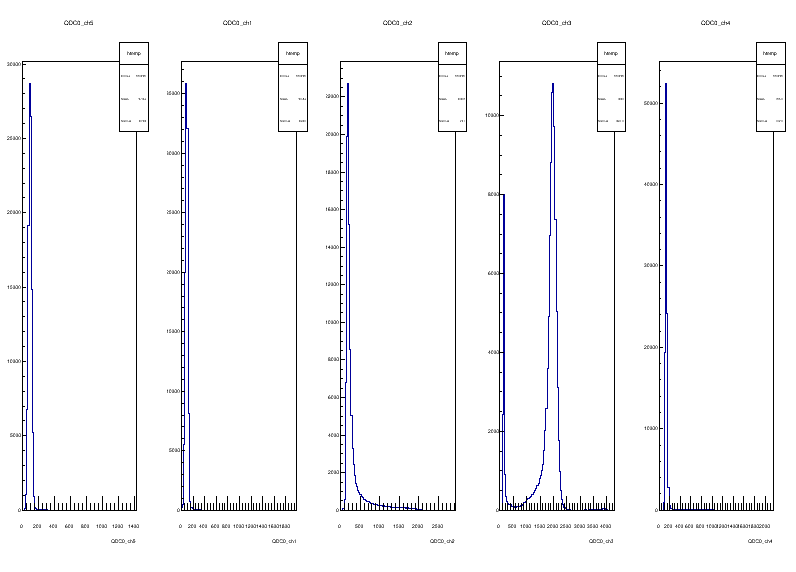

In [4]:
#1572179299
#1572188706

tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572191362.root'
data_run = ROOT.TFile(tfile_path)
ttree = data_run.Get('RAWdata')

c1 = TCanvas("c1", "c1", 800, 600)
c1.Divide(5,1)
c1.cd(1)
ttree.Draw("QDC0_ch5")
c1.cd(2)
ttree.Draw("QDC0_ch1")
c1.cd(3)
ttree.Draw("QDC0_ch2")
c1.cd(4)
ttree.Draw("QDC0_ch3")
c1.cd(5)
ttree.Draw("QDC0_ch4")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


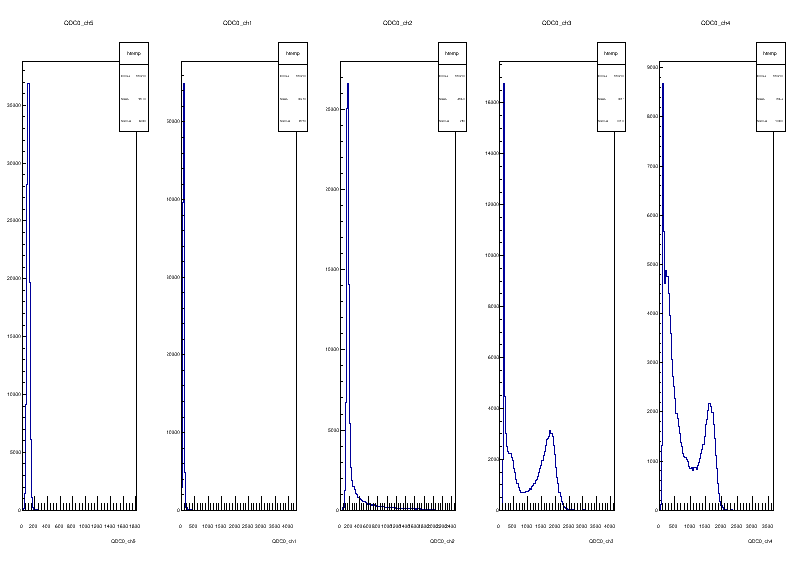

In [5]:

#1572179299
#1572188706

tfile_path = '/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572190918.root'
data_run = ROOT.TFile(tfile_path)
ttree = data_run.Get('RAWdata')

c1 = TCanvas("c1", "c1", 800, 600)
c1.Divide(5,1)
c1.cd(1)
ttree.Draw("QDC0_ch5")
c1.cd(2)
ttree.Draw("QDC0_ch1")
c1.cd(3)
ttree.Draw("QDC0_ch2")
c1.cd(4)
ttree.Draw("QDC0_ch3")
c1.cd(5)
ttree.Draw("QDC0_ch4")
c1.Draw()

In [37]:
track_list, mimosa_list = create_track_list(1572191362)

In [38]:
len(track_list)

173

[-0.37076000000000003, 0.14352, -0.1564, 0.9531200000000001, -0.2729333333333333, 0.58512]


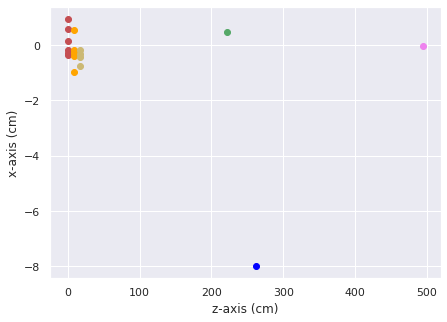

In [54]:
plt.figure(figsize=(7,5))
event = 140
x1 = [x[0] for x in track_list[event][0]]
x2 = [x[0] for x in track_list[event][1]]
x3 = [x[0] for x in track_list[event][2]]
x4 = [x[0] for x in track_list[event][3]]
x5 = [x for x in track_list[event][4]]
x6 = [x for x in track_list[event][5]]
print(x1)
for i in x1:
    plt.scatter(0, i, c='r')
for i in x2:
    plt.scatter(8.5, i, c='orange')
for i in x3:
    plt.scatter(16.5, i, c='y')
for i in x4:
    plt.scatter(221, i, c='g')
for i in x5:
    plt.scatter(262, i, c='blue')
for i in x6:
    plt.scatter(494, i, c='violet')

#plt.plot(best_pts[2], best_pts[0])
plt.ylabel('x-axis (cm)')
plt.xlabel('z-axis (cm)')
#plt.scatter(best_points[2], best_points[0])
plt.show()